In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


## Parte 1

In [4]:
# Select ODE & settings:
ode_name = 'TVLvODE2_d' # help="name of the ode", type=str
ode_param = "1.,-0.1,-1.5,0.075" # help="parameters of the ode (default: None)", type=str, default=None
freq = 20 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.0 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0 # help="dimentionality of the parameterizaiton discovery", type=int
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
time_vector = np.arange(0, ode.T + dt, dt)

In [5]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=n_sample,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)
# X_list = SINDy_data.existence_conditions(X_list, ode.init_low, n_variables=dim_x)

# save data:
# file_path = 'saved/data/TVLvODE_data.pkl'
# os.makedirs(os.path.dirname(file_path), exist_ok=True)
# with open(file_path, 'wb') as f:
#     dill.dump((X_list, dX_list, param_list, feature_names), f)

Traiettoria 0 :  [17.0514206  15.47072179  0.        ]
Traiettoria 1 :  [12.91283444 15.2391615   0.        ]
Traiettoria 2 :  [ 6.78667198 19.98647222  0.        ]
Traiettoria 3 :  [14.59522166 12.23946741  0.        ]
Traiettoria 4 :  [ 6.36387894 15.95889014  0.        ]
Traiettoria 5 :  [ 9.98338521 16.92773535  0.        ]
Traiettoria 6 :  [11.41071421  8.92087521  0.        ]
Traiettoria 7 :  [13.31578719  7.41610634  0.        ]
Traiettoria 8 :  [14.42189784 15.47754729  0.        ]
Traiettoria 9 :  [15.46089416 18.49263761  0.        ]
Traiettoria 10 :  [16.84924533 18.72733428  0.        ]
Traiettoria 11 :  [6.97835529 9.68673523 0.        ]
Traiettoria 12 :  [10.14155677 19.31189233  0.        ]
Traiettoria 13 :  [ 8.02339416 15.86396149  0.        ]
Traiettoria 14 :  [15.60986345  5.3136558   0.        ]
Traiettoria 15 :  [ 5.50098897 15.88318282  0.        ]
Traiettoria 16 :  [18.63875065 13.72488843  0.        ]
Traiettoria 17 :  [11.07740997 19.31853045  0.        ]
Traie

Con rumore ci impiega poco piu di 2 min per generare una singola traiettoria.
Si potrebbe parallelizzare, ma comunque la generazione è molto lunga.
In questa fase di testing possiamo mettere o rumore nullo o giocare con una sola traiettoria.
Ricorda di cambiare la std_base    

In [ ]:
SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:2])

In [ ]:
# uploda data:
# file_path = 'saved/data/TVLvODE_data.pkl'
# with open(file_path, 'rb') as f:
#     X_list, dX_list, param_list, feature_names = dill.load(f)

In [ ]:
# X = np.array(X_list)[:,:,:2]
# print('Shape: ',X.shape)

# vec_rmse = []
# for i in range(X.shape[0]):
#     rmse = root_mean_squared_error(X[i], np.zeros(X[i].shape))
#     print('RMSE: ', rmse)
#     vec_rmse.append(rmse)

# vec_rmse = np.array(vec_rmse)
# print('RMSE Mean: ', vec_rmse.mean())

In [3]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

Start = [50]
# Start = [20,21,22,23] 
# Start = [61,62,63,64,65] 
# Start = [50,53,55,56,57,60] 
for T in Start:
    print(' ')
    print('Simulazione tra: ', '[',T, ',',T+10, ']')
    run_DCODE(ode_name, param, 0, freq, n_sample, noise_ratio, seed=100, n_seed=1, T0=T, T=T+10)
    None

Running with: ode_name=TVLvODE2_d, ode_param=1.,-0.1,-1.5,0.075, x_id=0, freq=20, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
 
Simulazione tra:  [ 50 , 60 ]
ODE specified:  TVLvODE2_d
Data generated
Dataset shape before smoothing:  (201, 50, 3)
Dataset shape:  (101, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      3.20877e+38       11          8977.12            24039      2.21m
   1     9.39      8.87251e+14       34           9040.1          23794.6      1.95m
   2    10.31      5.28535e+14        3           8649.3          25080.6      1.72m
 
promising programs:
neg(neg(sin(X0)))
neg(sin(X1))
sub(sub(sub(sub(X1, X1), sin(X2)), sin(add(sin(4.692), add(X0, X1)))), neg(sin(mul(X1, X0

Con i seguenti parametri:
- IC: [16, 6, 0] x [24, 14, 0]
- n_gen = 14
- complexity = 0.5

trova un modello interessante, ma i dati non generalizzano visto la poca varianza dei dati...

- T = 30 -> pat = 1
- T = 33 -> pat = 2
- T = 35 -> pat = 3
- T = 56 -> pat = 4
- T = 57 -> pat = 5
- T = 58 -> pat = 6 
- T = 59 -> pat = 7
- T = 60 -> pat = 6 

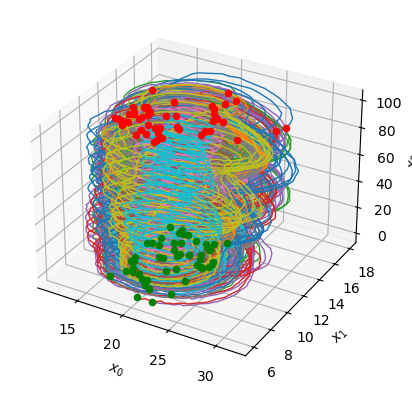

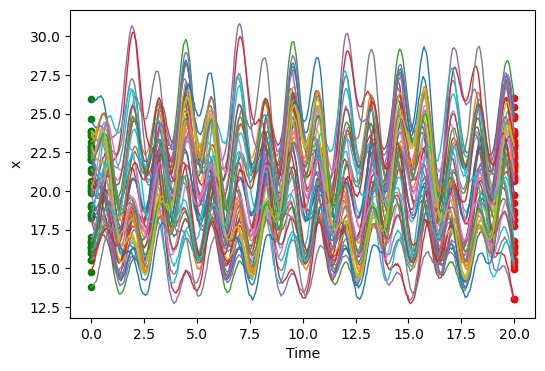

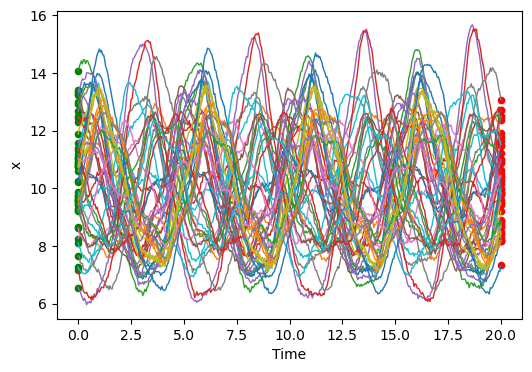

In [3]:
file_path = 'Online-Test/saved/data/TVLvODE2_d_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,400:800,0:1], 20)
SINDy_data.plot_configuration(np.array(X_list)[:,400:800,1:2], 20)

In [17]:
# Load data:
file_path = 'Online-Test/saved/data/TVLvODE2_d_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

T0 = 50
T = 60

for T0 in range(50,60):
    T=T0+10
    X_lista = [np.array(x)[T0*20:T*20, :] for x in X_list]
    dX_lista = [np.array(dx)[T0*20:T*20, :] for dx in dX_list]

    # lambda function:
    building_blocks_lambda = lambda X0, X1, X2: np.sin(5.006934060683674*X2)
    function_names = lambda X0, X1, X2: "sin( 5.006934060683674*"+ X2 + " )"

    # building the library:
    from toolbox.auxiliary_functions import intercept_library_fun
    intercept_library = intercept_library_fun(dim_x+dim_k)
    polynomial_library = ps.PolynomialLibrary(degree=2, include_bias=False)
    custom_library = ps.CustomLibrary(library_functions=[building_blocks_lambda], function_names=[function_names]) # custom library with building block
    generalized_library = ps.GeneralizedLibrary(libraries=[polynomial_library, custom_library],tensor_array=[[1, 1]])
    final_library = ps.ConcatLibrary([intercept_library, generalized_library]) # add the intercept


    model = ps.SINDy(feature_names=feature_names, feature_library=final_library, optimizer=ps.STLSQ(threshold=0.07))
    model.fit(X_lista, t=dt, multiple_trajectories=True, x_dot=dX_lista)
    print("Symbolic-SINDy model: ")
    model.print()

Symbolic-SINDy model: 
(X0)' = -3.316 1 + 1.196 X0 + -0.092 X0 X1 + 0.181 sin( 5.006934060683674*X2 ) + 0.345 X0 sin( 5.006934060683674*X2 )
(X1)' = -1.495 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = -5.362 1 + 1.300 X0 + 0.164 X1 + -0.101 X0 X1 + 0.207 sin( 5.006934060683674*X2 ) + 0.345 X0 sin( 5.006934060683674*X2 )
(X1)' = -1.495 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = -6.974 1 + 1.376 X0 + 0.337 X1 + -0.109 X0 X1 + 1.986 sin( 5.006934060683674*X2 ) + 0.088 X2 sin( 5.006934060683674*X2 )
(X1)' = -1.495 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = 20.692 1 + -1.864 X1 + 6.971 sin( 5.006934060683674*X2 )
(X1)' = -1.496 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = -3.600 1 + 1.210 X0 + -0.092 X0 X1 + 0.187 sin( 5.006934060683674*X2 ) + 0.344 X0 sin( 5.006934060683674*X2 )
(X1)' = -1.496 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = -5.740 1 + 1.320 X0 + 0.200 X1 + -0.103 X0 X1 + 12.488 

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Symbolic-SINDy model: 
(X0)' = -8.233 1 + 1.219 X0 + 0.072 X2 + -0.092 X0 X1 + 0.148 sin( 5.006934060683674*X2 ) + 0.344 X0 sin( 5.006934060683674*X2 )
(X1)' = -1.496 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = -5.558 1 + 1.302 X0 + 0.185 X1 + -0.102 X0 X1 + 6.960 sin( 5.006934060683674*X2 )
(X1)' = -1.496 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = 4.052 1 + 1.156 X0 + -0.143 X1 + -0.105 X2 + -0.085 X0 X1 + 0.296 sin( 5.006934060683674*X2 ) + 0.334 X0 sin( 5.006934060683674*X2 )
(X1)' = -1.496 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Symbolic-SINDy model: 
(X0)' = -3.962 1 + 1.226 X0 + -0.092 X0 X1 + 0.271 sin( 5.006934060683674*X2 ) + 0.335 X0 sin( 5.006934060683674*X2 )
(X1)' = -1.495 X1 + 0.075 X0 X1
(X2)' = 1.000 1


## Parte 2

In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE & settings:
ode_name = 'TVLvODE3' # help="name of the ode", type=str
ode_param = "1.,-0.1,-1.5, 0.075" # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 50 # help="number of trajectories", type=int, default=100
noise_ratio = 0.01 # help="noise level (default 0)", type=float, default=0.
dim_x = 3 # help="dimentionality of the problem", type=int
dim_k = 0
# ode_param, freq = set_param_freq(ode_param, freq)
# ode = equations.get_ode(ode_name, ode_param)
# time_vector = np.arange(0, ode.T + dt, dt)

In [3]:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=4,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)

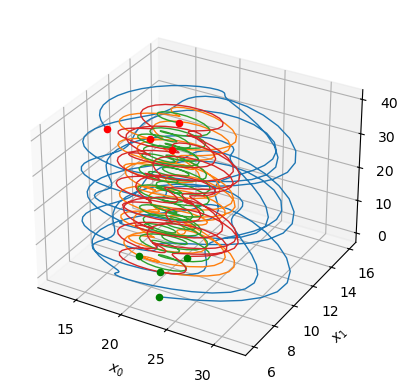

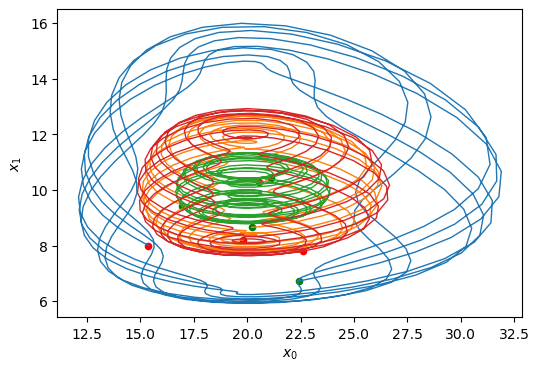

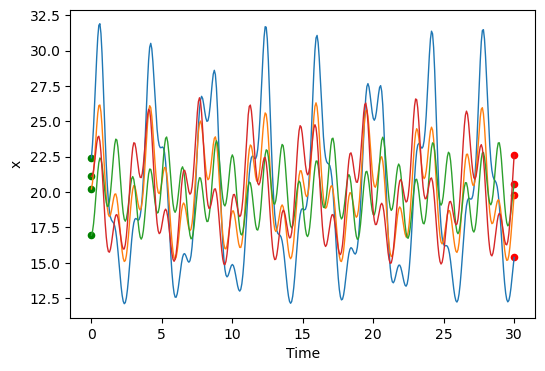

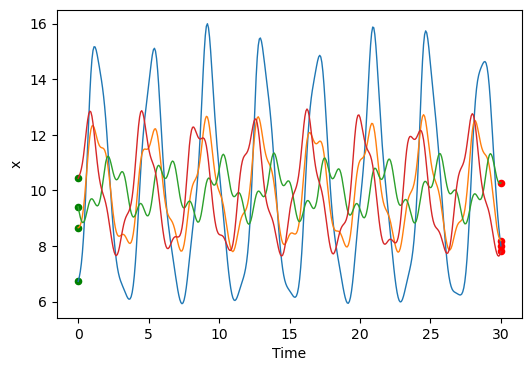

In [4]:
SINDy_data.plot_configuration(X_list)
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:2])
SINDy_data.plot_configuration(np.array(X_list)[:,:,0:1], 30)
SINDy_data.plot_configuration(np.array(X_list)[:,:,1:2], 30)

In [3]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq


# Start = [20, 22, 24, 26, 28, 30]#, 5, 10, 15, 20]
Start = [21, 23, 25, 27, 29, 31]
for T in Start:
    print(' ')
    print('Simulazione tra: ', '[',T, ',',T+10, ']')
    run_DCODE(ode_name, param, 0, freq, n_sample, noise_ratio, seed=100, n_seed=1, T0=T, T=T+10)
    None

Running with: ode_name=TVLvODE3, ode_param=1.,-0.1,-1.5, 0.075, x_id=0, freq=10, n_sample=50, noise_sigma=0.01, alg=tv, seed=100, n_seed=1
 
Simulazione tra:  [ 21 , 31 ]
ODE specified:  TVLvODE3
Data generated
Dataset shape before smoothing:  (101, 50, 3)
Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      2.71368e+33       13          46765.3          46996.2      2.73m
   1     7.68      1.07917e+12       13            46743          47197.3      2.19m
   2     9.46      2.39385e+11        7          46713.5          47461.7      2.19m
 
promising programs:
add(add(3.384, sub(sub(X0, X1), X1)), sin(add(4.691, X2)))
sub(add(sub(X0, X1), neg(X1)), add(sin(4.655), sin(neg(add(4.481

KeyboardInterrupt: 

T = 40 -> sin(3.988*X2)

In [ ]:
print("Running with: ode_name={}, ode_param={}, x_id={}, freq={}, n_sample={}, noise_sigma={}, alg={}, seed={}, n_seed={}".format(
    ode_name, ode_param, 0, freq, n_sample, noise_ratio, 'tv', 100, 1))

if ode_param is not None:
    param = [float(x) for x in ode_param.split(',')]
else:
    param = None
if freq >= 1:
    freq = int(freq)
else:
    freq = freq

run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0, T=20.) # -> 0.0420862788771289*X2 
# run_SRT(ode_name, param, 0, freq, n_sample, noise_ratio, 'tv', seed=100, n_seed=1, T0=0., T=10.)
None

# Parte 3

In [1]:
# Libraries:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Lasso

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.
from D_CODE.run_simulation import run as run_SRT
from D_CODE.run_simulation_vi import run as run_DCODE
from toolbox.auxiliary_functions import set_param_freq

from data import equations
from data import SINDy_data

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE & settings:
ode_name = 'TVLvODE2_d' # help="name of the ode", type=str
ode_param = None # help="parameters of the ode (default: None)", type=str, default=None
freq = 10 # Dovrebbe essere 195 per avere dt = 5.130 * 10−3 come nel paper di riferimento
dt = 1 / freq
n_sample = 200 # help="number of trajectories", type=int, default=100
noise_ratio = 0. # help="noise level (default 0)", type=float, default=0.
dim_x = 2 # help="dimentionality of the problem", type=int
dim_k = 0 # help="dimentionality of the parameterizaiton discovery", type=int
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)
time_vector = np.arange(0, ode.T + dt, dt)

In [3]:
# generate data:
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name=ode_name, 
                                                                   ode_param=ode_param,
                                                                   freq=freq,
                                                                   n_sample=n_sample,
                                                                   noise_ratio=noise_ratio,
                                                                   dim_x=dim_x,
                                                                   dim_k=dim_k)

In [4]:
X = np.array(dX_list)[:,:,:]
print('Shape: ',X.shape)

vec_rmse = []
for i in range(X.shape[0]):
    rmse = root_mean_squared_error(X[i], np.zeros(X[i].shape))
    print('RMSE: ', rmse)
    vec_rmse.append(rmse)

vec_rmse = np.array(vec_rmse)
print('RMSE Mean: ', vec_rmse.mean())

Shape:  (200, 1000, 2)
RMSE:  5.951445735694725
RMSE:  3.3066012564597163
RMSE:  3.8866785584520676
RMSE:  4.349655145709488
RMSE:  5.573445028981514
RMSE:  5.5859094195588135
RMSE:  3.753986454933738
RMSE:  5.997568588018405
RMSE:  5.6866027436168665
RMSE:  3.991442106296396
RMSE:  4.872833880505062
RMSE:  4.218880925471234
RMSE:  3.8700288244614622
RMSE:  4.180640665450509
RMSE:  4.408123836034367
RMSE:  5.916075665215967
RMSE:  4.461664099477877
RMSE:  6.263975821700093
RMSE:  4.621017297006758
RMSE:  4.743482836676872
RMSE:  5.324420818824209
RMSE:  4.584743877007541
RMSE:  5.111668279032207
RMSE:  3.249424366322112
RMSE:  5.603993219337946
RMSE:  4.611178500419417
RMSE:  6.004464330919689
RMSE:  3.8328875164339165
RMSE:  4.249525729737796
RMSE:  4.3870201490289205
RMSE:  3.625850212316947
RMSE:  4.9957512920744245
RMSE:  4.716789615207588
RMSE:  4.423479856675035
RMSE:  5.145267337728496
RMSE:  4.3813350180618915
RMSE:  5.322633962276451
RMSE:  4.672909790142725
RMSE:  4.275340097